## Klasifikasi dengan ektraksi fitur menggunakan Latent Dirichlet Allocation (LDA)

### Load Dataset

In [1]:
import pandas as pd
data = pd.read_csv('Data/tempo_berita.csv', on_bad_lines='skip')
data.head()

,id_berita,judul_berita,isi_berita,kategori_berita
0,2068883,Roy Suryo Ungkap Alasan Gelar Bedah Buku Jokow...,Tiga penulis bukuJokowi's White PaperyaituRoy ...,politik
1,2068882,Fadli Zon Digugat ke Pengadilan Soal Pemerkosa...,KOALISI Masyarakat Sipil Melawan Impunitas men...,politik
2,2068873,Jusuf Kalla: Tuntutan Demo Cerminkan Kondisi I...,MANTAN Wakil PresidenJusuf Kallamengatakan bah...,politik
3,2068871,Mu'ti: Sekolah Bisa Kembalikan Smart TV Jika T...,MENTERI Pendidikan Dasar dan Menengah Abdul Mu...,politik
4,2068869,Fraksi Gerindra soal Pengunduran Diri Rahayu S...,FRAKSI Gerindra mengaku kaget dengan keputusan...,politik


In [2]:
# Perbaikan untuk menghindari SettingWithCopyWarning
data_text = data.loc[:, ['isi_berita']]
# Tetapkan DataFrame yang sudah dimodifikasi ke variabel 'documents'.
documents = data_text
# Tampilkan semua baris data
print(documents)

                                            isi_berita
0    Tiga penulis bukuJokowi's White PaperyaituRoy ...
1    KOALISI Masyarakat Sipil Melawan Impunitas men...
2    MANTAN Wakil PresidenJusuf Kallamengatakan bah...
3    MENTERI Pendidikan Dasar dan Menengah Abdul Mu...
4    FRAKSI Gerindra mengaku kaget dengan keputusan...
..                                                 ...
895  TIMNAS U-23 Korea Selatan membuka perjalananny...
896  PEMAIN Timnas IndonesiaMees Hilgersbakal absen...
897  PENJAGA gawang muda asal BelgiaSenne Lammensbe...
898  PELATIHTimnas U-23Korea Selatan Lee Min-sung m...
899  PEMAIN sepak bola asal BrasilAntonymenangis sa...

[900 rows x 1 columns]


In [3]:
len(documents)

900

### Data Preprocessing

In [4]:
pip install gensim

Note: you may need to restart the kernel to use updated packages.


In [8]:
import gensim
from gensim.utils import simple_preprocess
from nltk.corpus import stopwords
from nltk.stem.porter import *
import numpy as np

In [9]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     /home/codespace/nltk_data...


True

In [10]:
def lemmatize_stemming(text):
    return stemmer.stem(WordNetLemmatizer().lemmatize(text, pos='v'))

def preprocess(text):
    result=[]
    for token in gensim.utils.simple_preprocess(text) :

        if token not in stopwords.words('english') and len(token) > 3:

            result.append(lemmatize_stemming(token))
    return result

In [11]:
# --- Bagian 1: Memuat dan Menyiapkan Data ---
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from gensim.utils import simple_preprocess
from gensim.corpora import Dictionary
from gensim.models import LdaModel
from nltk.stem import WordNetLemmatizer

# Unduh data NLTK
nltk.download('stopwords')
nltk.download('wordnet')

try:
    # Muat data dari file CSV
    data = pd.read_csv('Data/tempo_berita.csv', on_bad_lines='skip')

    # KUNCI PERBAIKAN: Pastikan documents adalah list of strings
    documents = data['isi_berita'].values.tolist()

    print(f"Total {len(documents)} dokumen berhasil dimuat.")

except (FileNotFoundError, KeyError) as e:
    print(f"Error: Terjadi kesalahan saat memuat data. {e}")
    documents = []


# --- Bagian 2: Preprocessing Teks ---
if documents:
    def lemmatize_stemming(text):
        stemmer = WordNetLemmatizer()
        return stemmer.lemmatize(text, pos='v')

    stop_words = stopwords.words('indonesian')

    def tokenisasi_dan_filter(teks):
        return [
            lemmatize_stemming(kata)
            for kata in simple_preprocess(str(teks))
            if kata not in stop_words and len(kata) > 2
        ]

    data_token = [tokenisasi_dan_filter(teks) for teks in documents]

    # --- Bagian 3: Mencoba Mengakses Dokumen Tertentu ---
    # Tentukan nomor dokumen yang ingin diambil
    # Berdasarkan output, total dokumen adalah 900
    document_num = 500

    # Cek apakah nomor dokumen valid
    if 1 <= document_num <= len(documents):
        # Ambil dokumen menggunakan indeks list (document_num - 1)
        doc_sample = documents[document_num - 1]

        print("\nOriginal document:")
        words = doc_sample.split()
        print(words)

        print("\n\nTokenized and lemmatized document:")
        print(tokenisasi_dan_filter(doc_sample))
    else:
        print(f"Nomor dokumen {document_num} tidak valid. Mohon pilih nomor antara 1 dan {len(documents)}.")

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/codespace/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /home/codespace/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Total 900 dokumen berhasil dimuat.

Original document:
['MUSISI', 'Darmawan', 'Kusumawardhana', 'Hardjakusumah', 'atau', 'yang', 'lebih', 'dikenal', 'denganAcil', 'Bimbomeninggal', 'pada', 'Senin,', '1', 'September', '2025', 'pukul', '22.13', 'WIB', 'di', 'Rumah', 'Sakit', 'Hasan', 'Sadikin', '(RSHS)', 'Bandung.', 'Acil', 'baru', 'saja', 'merayakan', 'ulang', 'tahunnya', 'yang', 'ke-82', 'pada', 'Rabu,', '20', 'Agustus', '2025.', 'Pilihan', 'Editor:4', 'Lirik', 'Lagu', 'Bimbo', 'ini', 'Selalu', 'Jadi', 'Pengantar', 'Ramadan', 'Termasuk', 'Sajadah', 'Panjang', 'Kabar', 'duka', 'ini', 'diumumkan', 'oleh', 'cucunya,Adhisty', 'Zara,', 'di', 'Instagram.', 'Aktris', '22', 'tahun', 'itu', 'mengunggah', 'foto', 'hitam', 'putih', 'yang', 'memperlihatkan', 'kakeknya', 'sedang', 'menyanyi.', '"Innalillahi', 'wa', 'inna', 'ilaihi', 'roojiuun', 'Darmawan', 'Kusumawardhana', 'Hardjakusumah', 'pada', 'hari', 'Senin,', '1', 'September', '2025', 'jam', '22.13.', 'Mohon', 'dibukakan', 'pintu', 'maaf', '

In [12]:
processed_docs = [preprocess(doc) for doc in data['isi_berita'].values]

In [13]:
processed_docs = data['isi_berita'].apply(preprocess)

print(processed_docs[:900])

0      [tiga, penulis, bukujokowi, white, paperyaitur...
1      [koalisi, masyarakat, sipil, melawan, impunita...
2      [mantan, wakil, presidenjusuf, kallamengatakan...
3      [menteri, pendidikan, dasar, menengah, abdul, ...
4      [fraksi, gerindra, mengaku, kaget, dengan, kep...
                             ...                        
895    [timnas, korea, selatan, membuka, perjalananny...
896    [pemain, timnas, indonesiamees, hilgersbakal, ...
897    [penjaga, gawang, muda, asal, belgiasenne, den...
898    [pelatihtimnas, korea, selatan, sing, mengatak...
899    [pemain, sepak, bola, asal, saat, menceritakan...
Name: isi_berita, Length: 900, dtype: object


### Get a BOW Dict from data

In [14]:
dictionary = gensim.corpora.Dictionary(processed_docs)

# Kode ini akan mengiterasi dan mencetak semua item dalam kamus
for k, v in dictionary.items():
    print(k, v)

0 acara
1 adalah
2 agustus
3 akan
4 akun
5 alasan
6 alias
7 atas
8 atau
9 ayahnya
10 ayat
11 bahwa
12 baik
13 bawah
14 bedah
15 berjalan
16 bidang
17 bilang
18 bisa
19 buat
20 buku
21 bukujokowi
22 buntut
23 calon
24 cara
25 celah
26 dalam
27 dari
28 demokrat
29 dengan
30 diberi
31 digelar
32 diketahui
33 dilakukan
34 dilaporkan
35 disempurnakan
36 diskursus
37 disusun
38 diuji
39 diukur
40 dokter
41 dugaan
42 editor
43 fitnah
44 fufufafa
45 gadjah
46 gubernur
47 hadapi
48 halaman
49 hasiholan
50 hendak
51 hukum
52 ijazah
53 ilmiah
54 ilmu
55 indeks
56 indonesia
57 infomasi
58 insyaallah
59 islam
60 jadi
61 jakarta
62 jawab
63 jika
64 jokowi
65 juga
66 justru
67 kalah
68 kalau
69 kali
70 kami
71 kamis
72 kampus
73 karena
74 kata
75 kedua
76 keilmuan
77 kemudian
78 kenapa
79 keraguan
80 ketiga
81 ketika
82 keyakinan
83 koleganya
84 komprehensif
85 kronologis
86 kuhp
87 kurang
88 lagi
89 lalu
90 langsung
91 lantas
92 laporan
93 lebih
94 mada
95 maju
96 mana
97 mantan
98 masih
99 masukan


### Filter the Dict

In [15]:
dictionary.filter_extremes(no_below=15, no_above=0.1, keep_n=100000)

### Convert document into BOW format by doc2bow

In [16]:
bow_corpus = [dictionary.doc2bow(doc) for doc in processed_docs]

In [17]:
# Buat kamus (dictionary) untuk menyimpan total hitungan kata
total_word_counts = {}

# Iterasi melalui setiap dokumen di bow_corpus
for bow_doc in bow_corpus:
    # Iterasi melalui setiap pasangan word_id dan count dalam dokumen
    for word_id, count in bow_doc:
        # Dapatkan kata asli dari dictionary
        word = dictionary[word_id]

        # Tambahkan hitungan ke total word counts
        if word in total_word_counts:
            total_word_counts[word] += count
        else:
            total_word_counts[word] = count

# Urutkan kata-kata berdasarkan total hitungannya secara menurun
sorted_words = sorted(total_word_counts.items(), key=lambda item: item[1], reverse=True)

# Cetak hitungan kata yang digabungkan untuk semua dokumen
print("Total hitungan kata untuk semua dokumen:")
for word, count in sorted_words:
    print(f"Kata '{word}' muncul {count} kali.")

Total hitungan kata untuk semua dokumen:
Kata 'marquez' muncul 410 kali.
Kata 'kabupaten' muncul 323 kali.
Kata 'israel' muncul 323 kali.
Kata 'serangan' muncul 269 kali.
Kata 'undang' muncul 264 kali.
Kata 'open' muncul 260 kali.
Kata 'hujan' muncul 246 kali.
Kata 'marc' muncul 239 kali.
Kata 'grup' muncul 238 kali.
Kata 'bola' muncul 216 kali.
Kata 'pidana' muncul 214 kali.
Kata 'program' muncul 211 kali.
Kata 'laut' muncul 206 kali.
Kata 'korban' muncul 204 kali.
Kata 'bali' muncul 199 kali.
Kata 'korupsi' muncul 194 kali.
Kata 'detik' muncul 193 kali.
Kata 'politik' muncul 192 kali.
Kata 'alex' muncul 187 kali.
Kata 'sebesar' muncul 184 kali.
Kata 'race' muncul 183 kali.
Kata 'gaza' muncul 181 kali.
Kata 'miliar' muncul 178 kali.
Kata 'perdana' muncul 178 kali.
Kata 'putri' muncul 177 kali.
Kata 'putaran' muncul 177 kali.
Kata 'bank' muncul 176 kali.
Kata 'skor' muncul 176 kali.
Kata 'tersangka' muncul 174 kali.
Kata 'gunung' muncul 174 kali.
Kata 'petenis' muncul 174 kali.
Kata 'n

### TF-IDF on our document set

In [18]:
tfidf = gensim.models.TfidfModel(bow_corpus)

In [19]:
corpus_tfidf = tfidf[bow_corpus]

In [20]:
for doc in corpus_tfidf:
    print(doc)

[(0, 0.08618274360726629), (1, 0.09079136790994206), (2, 0.0851283676073813), (3, 0.11597801743870104), (4, 0.07988463198520511), (5, 0.11738395338596402), (6, 0.11738395338596402), (7, 0.09618797164486978), (8, 0.1702567352147626), (9, 0.12373083656889577), (10, 0.09927611542717553), (11, 0.2842502151666478), (12, 0.15470602627066035), (13, 0.09847535491077769), (14, 0.12745611975745758), (15, 0.12039845720262303), (16, 0.23476790677192805), (17, 0.12553866294199095), (18, 0.0836099151737669), (19, 0.09205667067327021), (20, 0.08123072240665213), (21, 0.2510773258839819), (22, 0.12553866294199095), (23, 0.12949736675426482), (24, 0.2195127904307278), (25, 0.07615934879664332), (26, 0.11463192701725401), (27, 0.2273137980056108), (28, 0.1097563952153639), (29, 0.07282696943037056), (30, 0.12745611975745758), (31, 0.0836099151737669), (32, 0.0781745749355803), (33, 0.08783329292351856), (34, 0.07282696943037056), (35, 0.09546085109411868), (36, 0.09769436829371562), (37, 0.2001953544548

### Running LDA using Bag of Words data

In [24]:
lda_model = gensim.models.LdaMulticore(bow_corpus, num_topics=900, id2word = dictionary, passes = 50, workers=2)

In [25]:
for idx, topic in lda_model.print_topics():
    print("Topic: {} \nWords: {}".format(idx, topic))
    print("\n")

Topic: 839 
Words: 0.040*"rafael" + 0.037*"gerald" + 0.030*"garuda" + 0.028*"grup" + 0.028*"performa" + 0.023*"struick" + 0.017*"timnya" + 0.017*"menurun" + 0.017*"kompetisi" + 0.017*"terbang"


Topic: 485 
Words: 0.001*"fakta" + 0.001*"gugatan" + 0.001*"korban" + 0.001*"tindakan" + 0.001*"marquez" + 0.001*"angka" + 0.001*"pers" + 0.001*"bezzecchi" + 0.001*"investigasi" + 0.001*"quartararo"


Topic: 868 
Words: 0.081*"pidana" + 0.051*"bandara" + 0.035*"akun" + 0.035*"pasal" + 0.029*"pelaku" + 0.025*"ayat" + 0.025*"ancaman" + 0.020*"tindakan" + 0.020*"pengamanan" + 0.020*"tindak"


Topic: 718 
Words: 0.001*"marquez" + 0.001*"sesi" + 0.001*"korban" + 0.001*"lintasan" + 0.001*"tersangka" + 0.001*"basah" + 0.001*"ditemukan" + 0.001*"sprint" + 0.001*"mencatatkan" + 0.001*"martin"


Topic: 218 
Words: 0.033*"pengunjuk" + 0.030*"protes" + 0.030*"nepal" + 0.029*"parlemen" + 0.026*"demonstran" + 0.019*"perdana" + 0.016*"demonstrasi" + 0.015*"kathmandu" + 0.014*"india" + 0.014*"mundur"


Topic: 

### Topic coherence

In [26]:
from gensim.models import CoherenceModel

coherence_model_lda = CoherenceModel(model=lda_model, texts=processed_docs, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.4871269062437601


In [27]:
from gensim.models import CoherenceModel

coherence_model_lda = CoherenceModel(model=lda_model, texts=processed_docs, dictionary=dictionary, coherence="u_mass")
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  -3.5614645387674257


### Find the Optimal Number of Topics

In [28]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        # Ubah 'passes' menjadi nilai yang lebih besar, misalnya 50
        model = gensim.models.LdaMulticore(corpus=corpus, id2word=dictionary, num_topics=num_topics, passes=50, random_state=100)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
    return model_list, coherence_values

In [30]:
model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=bow_corpus, texts=processed_docs, start=2, limit=40, step=6)

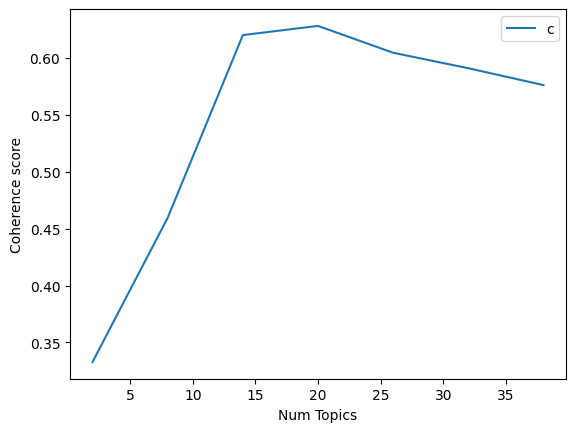

In [31]:
import matplotlib.pyplot as plt
limit=40; start=2; step=6;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()
#seem

### Running LDA using TF-IDF

In [32]:
lda_model_tfidf = gensim.models.ldamulticore.LdaMulticore(
    corpus=corpus_tfidf,
    num_topics=100
    ,
    id2word=dictionary,
    passes=50,  # Nilai yang ditingkatkan
    workers=4
)

In [33]:
for idx, topic in lda_model_tfidf.print_topics(-1):
    print("Topic: {} Word: {}".format(idx, topic))
    print("\n")

Topic: 0 Word: 0.001*"mengajukan" + 0.001*"perdana" + 0.001*"open" + 0.001*"permohonan" + 0.001*"benar" + 0.001*"aktivis" + 0.001*"persetujuan" + 0.001*"apakah" + 0.001*"turnamen" + 0.001*"pertamanya"


Topic: 1 Word: 0.001*"benar" + 0.001*"memang" + 0.001*"dekade" + 0.001*"melainkan" + 0.001*"spanyol" + 0.001*"justru" + 0.001*"muncul" + 0.001*"dikenal" + 0.001*"kursi" + 0.001*"merasa"


Topic: 2 Word: 0.001*"nepal" + 0.001*"protes" + 0.001*"menyerukan" + 0.001*"pengunjuk" + 0.001*"tentara" + 0.001*"mengakhiri" + 0.001*"korupsi" + 0.001*"pemimpin" + 0.001*"sebut" + 0.001*"gempa"


Topic: 3 Word: 0.021*"grup" + 0.016*"laos" + 0.014*"bola" + 0.014*"lebanon" + 0.014*"makau" + 0.012*"mencetak" + 0.012*"garuda" + 0.012*"kluivert" + 0.010*"gelora" + 0.010*"gerald"


Topic: 4 Word: 0.084*"pulau" + 0.084*"perikanan" + 0.066*"kelautan" + 0.048*"kegiatan" + 0.039*"riau" + 0.024*"lokal" + 0.023*"fakultas" + 0.022*"model" + 0.022*"diharapkan" + 0.018*"balai"


Topic: 5 Word: 0.001*"ternyata" + 0.0

In [34]:
from gensim.models import CoherenceModel

coherence_model_lda_idf = CoherenceModel(model=lda_model_tfidf, texts=processed_docs, dictionary=dictionary, coherence='c_v')
coherence_model_lda_idf = coherence_model_lda_idf.get_coherence()
print('\nCoherence Score: ', coherence_model_lda_idf)


Coherence Score:  0.4239728662785734


### Classifying Sample Document Using LDA Bag of Words Model

In [36]:
# Asumsikan 'documents' sudah didefinisikan dari sel sebelumnya
document_num = 100

# Pastikan nomor dokumen yang dipilih valid
if 1 <= document_num <= len(documents):
    # Ambil dokumen asli (sebagai string)
    doc_sample_string = documents[document_num - 1]

    print("Original document:")
    print(doc_sample_string)

    print("\n\nTokenized and lemmatized document:")
    # Panggil fungsi preprocess dengan string asli
    print(preprocess(doc_sample_string))
else:
    print(f"Nomor dokumen {document_num} tidak valid. Mohon pilih nomor antara 1 dan {len(documents)}.")

Original document:
BADAN Eksekutif Mahasiswa Universitas Indonesia (BEM UI) menyinggung pernyataan Menteri Keuangan yang baru,PurbayaYudhi Sadewa. Dalam aksi di depan DPR, Selasa, 9 September 2025, Ketua BEM UI Atan Zayyid Sulthan Rahman menyebut pernyataan itu merendahkan aspirasi mahasiswa. "Menteri Keuangan baru diganti sehari, dia sudah menyatakan bahwa masyarakat itu, tuntutan 17+8 hanya sebagian kecil. Bahkan mendiskreditkan kami dengan bilang kalau sudah makan enak, maka tidak akan demo," kata dia ditemui di lokasi. Atan mengatakan mahasiswa tidak akan berhenti aksi meski diremehkan. Menurut dia, sikap pejabat publik yang meremehkan tuntutan mahasiswa hanya akan memantik perlawanan. "Mau kami makan enak atau tidak, kalau pemerintahan masih bobrok, tuntutan kami tidak dipenuhi, kami akan terus demo," ujar dia. Sebelumnnya Purbaya Yudhi Sadewa menanggapi 17+8 tuntutan rakyat sesaat setelah ia dilantik menggantikan Sri Mulyani Indrawati pada Senin, 8 September 2025. Ia mengaku belu

In [37]:
for i in range(len(bow_corpus)):
    print(f"\nDokumen ke-{i+1}:")
    for index, score in sorted(lda_model[bow_corpus[i]], key=lambda tup: tup[1], reverse=True):
        print("\tSkor: {:.4f}\t Topik: {}".format(score, lda_model.print_topic(index, 5)))


Dokumen ke-1:
	Skor: 0.9856	 Topik: 0.048*"honda" + 0.029*"dilaporkan" + 0.029*"pasal" + 0.029*"laporan" + 0.029*"tulis"

Dokumen ke-2:
	Skor: 0.9909	 Topik: 0.070*"undang" + 0.043*"koalisi" + 0.043*"sipil" + 0.035*"peristiwa" + 0.026*"bukti"

Dokumen ke-3:
	Skor: 0.9641	 Topik: 0.097*"tuntutan" + 0.027*"pendek" + 0.027*"jangka" + 0.023*"sipil" + 0.020*"perubahan"
	Skor: 0.0286	 Topik: 0.097*"sipil" + 0.058*"menuntut" + 0.046*"kekerasan" + 0.044*"bentuk" + 0.042*"perempuan"

Dokumen ke-4:
	Skor: 0.8607	 Topik: 0.156*"sekolah" + 0.051*"distribusi" + 0.045*"pendidikan" + 0.040*"minta" + 0.033*"swasta"
	Skor: 0.1281	 Topik: 0.170*"perangkat" + 0.075*"ikut" + 0.075*"tentara" + 0.075*"terlibat" + 0.075*"berhak"

Dokumen ke-5:
	Skor: 0.5174	 Topik: 0.096*"gerindra" + 0.084*"bambang" + 0.070*"fraksi" + 0.061*"rahayu" + 0.059*"undang"
	Skor: 0.4704	 Topik: 0.036*"mengundurkan" + 0.035*"sharma" + 0.030*"kader" + 0.030*"hidup" + 0.025*"parlemen"

Dokumen ke-6:
	Skor: 0.9906	 Topik: 0.156*"sekol

In [38]:
lda_model[bow_corpus[document_num]]

[(7, 0.9916757)]

In [39]:
sorted(lda_model[bow_corpus[document_num]], key=lambda tup: tup[1], reverse=True)

[(7, 0.99148667)]

In [40]:
lda_model.print_topic(index, 581)

'0.055*"unite" + 0.053*"sini" + 0.042*"transfer" + 0.034*"tahu" + 0.027*"sulit" + 0.027*"menunggu" + 0.027*"klub" + 0.027*"kasih" + 0.024*"mencetak" + 0.021*"sepak" + 0.018*"merasa" + 0.018*"biaya" + 0.018*"kontrak" + 0.018*"sambil" + 0.018*"miliar" + 0.018*"sekarang" + 0.018*"mengapa" + 0.018*"sebesar" + 0.018*"berterima" + 0.016*"konferensi" + 0.016*"bola" + 0.016*"meskipun" + 0.015*"performa" + 0.012*"bursa" + 0.011*"liga" + 0.009*"uang" + 0.009*"mendatang" + 0.009*"awalnya" + 0.009*"keluarga" + 0.009*"daripada" + 0.009*"hotel" + 0.009*"senang" + 0.009*"yakin" + 0.009*"sembilan" + 0.009*"memungkinkan" + 0.009*"sesuatu" + 0.009*"mengenakan" + 0.009*"membantu" + 0.009*"kariernya" + 0.009*"berbeda" + 0.009*"tenis" + 0.009*"biasa" + 0.009*"penuh" + 0.009*"penutupan" + 0.009*"sana" + 0.009*"setengah" + 0.009*"meyakinkan" + 0.009*"membayar" + 0.009*"itulah" + 0.009*"datang" + 0.009*"setara" + 0.009*"momen" + 0.009*"penggemar" + 0.009*"tambahan" + 0.009*"selalu" + 0.009*"status" + 0.009*"s

### Classifying Sample Document Using LDA TF-IDF Model

In [41]:
# Cek hasil dari model
result = lda_model_tfidf[bow_corpus[document_num]]
print(f"Hasil dari model: {result}")

# Jika hasilnya tidak kosong, jalankan perulangan
if result:
    for index, score in sorted(result, key=lambda tup: tup[1], reverse=True):
        print(f"Skor: {score}\tTopik: {lda_model_tfidf.print_topic(index, 5)}")

Hasil dari model: [(3, 0.112267435), (6, 0.06296599), (8, 0.019736642), (10, 0.0206301), (13, 0.19572487), (17, 0.13987155), (25, 0.19365053), (30, 0.016976656), (31, 0.010503662), (33, 0.014743119), (72, 0.010834607), (80, 0.060479976), (83, 0.014264227), (89, 0.033477925), (96, 0.05392926)]
Skor: 0.19572487473487854	Topik: 0.037*"ferry" + 0.036*"polda" + 0.035*"metro" + 0.034*"jaya" + 0.026*"siber"
Skor: 0.1936505287885666	Topik: 0.023*"hakim" + 0.022*"tuntutan" + 0.019*"sidang" + 0.018*"palestina" + 0.018*"sipil"
Skor: 0.13987155258655548	Topik: 0.015*"korban" + 0.014*"program" + 0.013*"pembangunan" + 0.012*"sumber" + 0.011*"lingkungan"
Skor: 0.11226743459701538	Topik: 0.021*"grup" + 0.016*"laos" + 0.014*"bola" + 0.014*"lebanon" + 0.014*"makau"
Skor: 0.062965989112854	Topik: 0.076*"saham" + 0.045*"kampus" + 0.044*"riset" + 0.041*"kelompok" + 0.034*"kamar"
Skor: 0.06047997623682022	Topik: 0.087*"nepal" + 0.051*"protes" + 0.039*"pengunjuk" + 0.028*"ditangkap" + 0.028*"kathmandu"
Skor:

### Testing Model on Unseen Document

In [54]:
unseen_documents = [
    "Pemerintah berencana menaikkan harga bahan bakar minyak bulan depan untuk menekan subsidi energi.",
    "Timnas Indonesia berhasil lolos ke semifinal Piala Asia setelah mengalahkan Jepang dengan skor 2-1.",
    "Peneliti menemukan vaksin baru yang mampu meningkatkan kekebalan tubuh terhadap varian terbaru virus corona.",
    "Bank Indonesia memperkirakan inflasi tahun 2025 akan tetap terkendali meski ada tekanan dari harga pangan.",
    "Samsung memperkenalkan teknologi layar lipat generasi baru dengan daya tahan yang lebih kuat dan ringan.",
    "Kementerian Pendidikan meluncurkan program digitalisasi sekolah untuk mempercepat transformasi pendidikan nasional."
]

# Gunakan dictionary internal dari model, bukan yang mungkin berubah
dictionary = lda_model_tfidf.id2word

# Testing dokumen baru
for i, unseen_doc in enumerate(unseen_documents):
    bow_vector = dictionary.doc2bow(preprocess(unseen_doc), allow_update=False)
    print(f"\n--- Analisis Dokumen ke-{i+1} ({unseen_doc}) ---")

    if bow_vector:
        for index, score in sorted(lda_model_tfidf[bow_vector], key=lambda tup: tup[1], reverse=True):
            print(f"Skor: {score:.4f}\tTopik: {lda_model_tfidf.print_topic(index, 5)}")
    else:
        print("Tidak ada kata yang terdeteksi di dokumen ini.")





--- Analisis Dokumen ke-1 (Pemerintah berencana menaikkan harga bahan bakar minyak bulan depan untuk menekan subsidi energi.) ---
Skor: 0.4303	Topik: 0.015*"korban" + 0.014*"program" + 0.013*"pembangunan" + 0.012*"sumber" + 0.011*"lingkungan"
Skor: 0.1689	Topik: 0.038*"mahasiswa" + 0.032*"industri" + 0.027*"kenaikan" + 0.027*"produksi" + 0.025*"pabrik"
Skor: 0.1437	Topik: 0.069*"proyek" + 0.069*"nelayan" + 0.034*"menghadirkan" + 0.033*"pulau" + 0.031*"produk"
Skor: 0.1198	Topik: 0.116*"harga" + 0.093*"bahasa" + 0.042*"raja" + 0.030*"tiket" + 0.017*"reguler"

--- Analisis Dokumen ke-2 (Timnas Indonesia berhasil lolos ke semifinal Piala Asia setelah mengalahkan Jepang dengan skor 2-1.) ---
Skor: 0.6020	Topik: 0.074*"putri" + 0.058*"tunggal" + 0.046*"kejuaraan" + 0.042*"kong" + 0.040*"hong"
Skor: 0.2020	Topik: 0.022*"gelar" + 0.017*"selalu" + 0.015*"instagram" + 0.015*"video" + 0.014*"semifinal"

--- Analisis Dokumen ke-3 (Peneliti menemukan vaksin baru yang mampu meningkatkan kekebalan 

### Tugas LDA

In [55]:
# --- Bagian 1: Memuat dan Menyiapkan Data ---
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from gensim.utils import simple_preprocess
from gensim.corpora import Dictionary
from gensim.models import LdaModel
from nltk.stem import WordNetLemmatizer
import io

try:
    nltk.download('stopwords', quiet=True)
    nltk.download('wordnet', quiet=True)
except Exception as e:
    print(f"Gagal mengunduh data NLTK: {e}")

try:
    data = pd.read_csv('Data/tempo_berita.csv', on_bad_lines='skip')
    documents = data['isi_berita'].values.tolist()
    print(f"Total {len(documents)} dokumen berhasil dimuat.")

except (FileNotFoundError, KeyError) as e:
    print(f"Error: Terjadi kesalahan saat memuat data. {e}")
    documents = []

# --- Bagian 2: Preprocessing Teks ---
if documents:
    def lemmatize_stemming(text):
        stemmer = WordNetLemmatizer()
        return stemmer.lemmatize(text, pos='v')

    stop_words = stopwords.words('indonesian')

    def tokenisasi_dan_filter(teks):
        return [
            lemmatize_stemming(kata)
            for kata in simple_preprocess(str(teks))
            if kata not in stop_words and len(kata) > 2
        ]

    data_token = [tokenisasi_dan_filter(teks) for teks in documents]

    kamus = Dictionary(data_token)
    kamus.filter_extremes(no_below=15, no_above=0.1, keep_n=100000)
    korpus = [kamus.doc2bow(teks) for teks in data_token]

    num_topik = 20
    lda_model = LdaModel(
        korpus,
        num_topics=num_topik,
        id2word=kamus,
        passes=50,
        random_state=100
    )

    # --- Bagian 3: Membuat Tabel Proporsi Kata dalam Topik ---
    all_topics = lda_model.show_topics(num_topics=num_topik, num_words=20, formatted=False)

    proporsi_kata = []
    for topic_id, word_weights in all_topics:
        for word, weight in word_weights:
            proporsi_kata.append([f"Topik {topic_id}", word, weight])

    df_proporsi_kata = pd.DataFrame(proporsi_kata, columns=['Topik', 'Kata', 'Proporsi'])
    print("\n--- Tabel 1: Proporsi Kata dalam Topik ---")
    print(df_proporsi_kata)

    # --- Bagian 4: Membuat Tabel Proporsi Topik dalam Dokumen ---
    proporsi_topik = []
    for i, doc_bow in enumerate(korpus):
        doc_topics = lda_model.get_document_topics(doc_bow, minimum_probability=0.0)

        row_data = {'Dokumen ID': i}
        for topic_id, proporsi in doc_topics:
            row_data[f"Topik {topic_id}"] = proporsi

        proporsi_topik.append(row_data)

    df_proporsi_topik = pd.DataFrame(proporsi_topik).fillna(0)
    cols = ['Dokumen ID'] + [f'Topik {i}' for i in range(num_topik)]
    df_proporsi_topik = df_proporsi_topik[cols]
    print("\n--- Tabel 2: Proporsi Topik dalam Dokumen ---")
    print(df_proporsi_topik)

    # --- Bagian 5: Menyimpan dan Mengunduh File CSV Otomatis ---
    # Simpan DataFrame pertama ke file CSV yang berbeda
    csv_file1 = "proporsi_dokumen.csv"
    df_proporsi_topik.to_csv(csv_file1, index=False)

    # Simpan DataFrame kedua ke file CSV yang berbeda
    csv_file2 = "proporsi_kata.csv"
    df_proporsi_kata.to_csv(csv_file2, index=False)

    print(f"\nFile '{csv_file1}' dan '{csv_file2}' berhasil dibuat dan siap diunduh.")

    # Anda bisa menggunakan kode ini untuk mengunduh file secara terpisah
    # files.download(csv_file1)
    # files.download(csv_file2)

else:
    print("Tidak dapat melanjutkan karena data dokumen tidak tersedia.")

Total 900 dokumen berhasil dimuat.

--- Tabel 1: Proporsi Kata dalam Topik ---
        Topik         Kata  Proporsi
0     Topik 0      marquez  0.052229
1     Topik 0         marc  0.027658
2     Topik 0         alex  0.023304
3     Topik 0         race  0.023003
4     Topik 0        finis  0.020205
..        ...          ...       ...
395  Topik 19       indeks  0.008251
396  Topik 19      putusan  0.008176
397  Topik 19         dana  0.007707
398  Topik 19          sri  0.007641
399  Topik 19  pertumbuhan  0.007609

[400 rows x 3 columns]

--- Tabel 2: Proporsi Topik dalam Dokumen ---
     Dokumen ID   Topik 0   Topik 1   Topik 2   Topik 3   Topik 4   Topik 5  \
0             0  0.000848  0.000848  0.000848  0.000848  0.000848  0.000848   
1             1  0.000424  0.000424  0.000424  0.000424  0.000424  0.000424   
2             2  0.000400  0.000400  0.000400  0.000400  0.000400  0.980545   
3             3  0.000676  0.000676  0.116443  0.000676  0.084255  0.000676   
4          

### Klasifikasi

In [56]:
pip install gensim scikit-learn pandas

Note: you may need to restart the kernel to use updated packages.


In [57]:
import pandas as pd
import re
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import ast
import gensim
from gensim.utils import simple_preprocess
import numpy as np
import os
import warnings

warnings.filterwarnings("ignore")

# --- 1. Memuat dan Menyiapkan Data ---
file_path = 'Data/tempo_berita.csv'   # pastikan file ini sudah diupload di Colab
text_column = 'isi_berita'               # kolom berisi teks/token
label_column = 'kategori_berita'                # kolom label kategori

try:
    df = pd.read_csv(file_path)
    if text_column not in df.columns or label_column not in df.columns:
        print(f"❌ Error: Kolom '{text_column}' atau '{label_column}' tidak ditemukan.")
        print(f"Kolom tersedia: {list(df.columns)}")
        raise SystemExit
    df = df[[text_column, label_column]].copy()
    print("✅ Data berhasil dimuat.")
except FileNotFoundError:
    raise SystemExit(f"❌ File '{file_path}' tidak ditemukan di direktori kerja.")

# --- 2. Normalisasi Kolom Token ---
def detect_list_format(sample):
    """Deteksi apakah kolom berisi list (misalnya ['kata']) atau teks biasa."""
    if isinstance(sample, str) and sample.strip().startswith('[') and sample.strip().endswith(']'):
        return "list"
    return "text"

if not df[text_column].dropna().empty:
    sample_data = str(df[text_column].dropna().iloc[0])
    data_format = detect_list_format(sample_data)
else:
    data_format = "unknown"

print(f"📄 Format data terdeteksi: {data_format}")

def normalize_tokens(value):
    """Pastikan setiap entri menjadi list token yang valid."""
    if isinstance(value, list):
        return [t for t in value if isinstance(t, str) and t.strip() != ""]
    if isinstance(value, str):
        value = value.strip()
        if value.startswith('[') and value.endswith(']'):
            try:
                parsed = ast.literal_eval(value)
                if isinstance(parsed, list):
                    return [t for t in parsed if isinstance(t, str) and t.strip() != ""]
            except Exception:
                pass
        # Jika string biasa, tokenize dengan gensim
        return simple_preprocess(value)
    return []

# Terapkan normalisasi
df['tokens'] = df[text_column].apply(normalize_tokens)

# Hitung jumlah dokumen kosong & tidak kosong
total_docs = len(df)
nonempty_docs = df['tokens'].apply(len).gt(0).sum()
empty_docs = total_docs - nonempty_docs
print(f"📊 Total dokumen: {total_docs}, Non-kosong: {nonempty_docs}, Kosong: {empty_docs}")

# Hapus baris kosong
df = df[df['tokens'].apply(len) > 0].reset_index(drop=True)
if df.empty:
    raise SystemExit("❌ Tidak ada dokumen berisi token setelah normalisasi. Periksa isi file CSV.")

# --- 3. Membuat Dictionary & Corpus untuk LDA ---
dictionary = gensim.corpora.Dictionary(df['tokens'])
if len(dictionary) == 0:
    raise SystemExit("❌ Dictionary kosong. Tidak ada kata yang bisa dipelajari.")
corpus = [dictionary.doc2bow(tokens) for tokens in df['tokens']]
print(f"📘 Jumlah term unik: {len(dictionary)} | Jumlah dokumen: {len(corpus)}")

# --- 4. Pelatihan Model LDA ---
num_topics = min(8, len(df[label_column].unique()))  # jumlah topik disesuaikan jumlah kategori
workers = max(1, min(4, os.cpu_count() or 1))

lda_model = gensim.models.LdaMulticore(
    corpus=corpus,
    num_topics=num_topics,
    id2word=dictionary,
    passes=900,
    workers=workers,
    random_state=42
)

print("✅ Model LDA berhasil dilatih.")

# --- 5. Mendapatkan vektor topik untuk setiap dokumen ---
def get_topic_vector(lda_model, bow_vector, num_topics):
    topic_weights = np.zeros(num_topics)
    topic_scores = lda_model.get_document_topics(bow_vector)
    for topic_id, score in topic_scores:
        if 0 <= topic_id < num_topics:
            topic_weights[topic_id] = score
    return topic_weights

X = np.array([get_topic_vector(lda_model, doc, num_topics) for doc in corpus])
y = df[label_column].values

# --- 6. Pelatihan & Evaluasi Logistic Regression ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# --- 7. Evaluasi Model ---
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, zero_division=0)

print("\n--- 📈 Hasil Klasifikasi ---")
print(f"Akurasi Model: {accuracy:.4f}\n")
print("Laporan Klasifikasi:")
print(report)

# --- 8. Menampilkan Top Kata Tiap Topik ---
print("\n--- 🔍 Top Kata per Topik (Top 10) ---")
for t in range(num_topics):
    print(f"Topik {t}: ", [word for word, prob in lda_model.show_topic(t, topn=10)])

print("\nProses selesai.")

✅ Data berhasil dimuat.
📄 Format data terdeteksi: text
📊 Total dokumen: 900, Non-kosong: 900, Kosong: 0
📘 Jumlah term unik: 20894 | Jumlah dokumen: 900
✅ Model LDA berhasil dilatih.

--- 📈 Hasil Klasifikasi ---
Akurasi Model: 0.5833

Laporan Klasifikasi:
               precision    recall  f1-score   support

      ekonomi       0.48      0.60      0.53        20
      hiburan       0.57      0.60      0.59        20
        hukum       0.29      0.10      0.15        20
internasional       0.48      0.75      0.59        20
   lingkungan       0.76      0.80      0.78        20
     olahraga       0.70      0.35      0.47        20
     otomotif       0.67      0.80      0.73        20
      politik       0.44      0.35      0.39        20
    sepakbola       0.72      0.90      0.80        20

     accuracy                           0.58       180
    macro avg       0.57      0.58      0.56       180
 weighted avg       0.57      0.58      0.56       180


--- 🔍 Top Kata per Topik (